In [1]:
pip install chart_studio

     |████████████████████████████████| 64 kB 2.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn.cluster import KMeans


**mounting drive to collab notebook**

In [3]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [6]:
%cd /content/

/content


In [7]:
%cd "/content/gdrive/MyDrive/Colab"


/content/gdrive/MyDrive/Colab


In [8]:
!ls

customer_segmentation.ipynb  data.csv


**reading data.csv file**

In [104]:
df1=pd.read_csv('data.csv',encoding='ISO-8859-1')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**dropping columns that are not required**

In [105]:
df1.drop(['InvoiceNo','StockCode','Description'],axis=1,inplace=True)
df1

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...
541904,12,12/9/2011 12:50,0.85,12680.0,France
541905,6,12/9/2011 12:50,2.10,12680.0,France
541906,4,12/9/2011 12:50,4.15,12680.0,France
541907,4,12/9/2011 12:50,4.15,12680.0,France


**multiplying quantity and unit price to come up with money spent by each customer**

In [106]:
df1['revenue']=df1['Quantity']*df1['UnitPrice']
df1

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...
541904,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,4,12/9/2011 12:50,4.15,12680.0,France,16.60


**dropping off quantity , unit price**

In [107]:
df1.drop(['Quantity','UnitPrice'],axis=1,inplace=True)
df1

,InvoiceDate,CustomerID,Country,revenue
0,12/1/2010 8:26,17850.0,United Kingdom,15.30
1,12/1/2010 8:26,17850.0,United Kingdom,20.34
2,12/1/2010 8:26,17850.0,United Kingdom,22.00
3,12/1/2010 8:26,17850.0,United Kingdom,20.34
4,12/1/2010 8:26,17850.0,United Kingdom,20.34
...,...,...,...,...
541904,12/9/2011 12:50,12680.0,France,10.20
541905,12/9/2011 12:50,12680.0,France,12.60
541906,12/9/2011 12:50,12680.0,France,16.60
541907,12/9/2011 12:50,12680.0,France,16.60


***checking dataset***


1.   **we will find out missing data and do imputations**
2.   **we will see if customer id of 2 or more countries match**



In [108]:
# checking for missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = ((df1.isnull().sum()/len(df1))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage of total data'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df1[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percentage of total data,type
nan col,,,
CustomerID,135080,24.926694,float64


**as we can see customer id has more than 20% missing data. we will have to drop this missing rows, as there are no ways of imputing missing values.**

In [109]:
#dropping nan values
df1=df1.dropna(axis=0)
df1

,InvoiceDate,CustomerID,Country,revenue
0,12/1/2010 8:26,17850.0,United Kingdom,15.30
1,12/1/2010 8:26,17850.0,United Kingdom,20.34
2,12/1/2010 8:26,17850.0,United Kingdom,22.00
3,12/1/2010 8:26,17850.0,United Kingdom,20.34
4,12/1/2010 8:26,17850.0,United Kingdom,20.34
...,...,...,...,...
541904,12/9/2011 12:50,12680.0,France,10.20
541905,12/9/2011 12:50,12680.0,France,12.60
541906,12/9/2011 12:50,12680.0,France,16.60
541907,12/9/2011 12:50,12680.0,France,16.60


In [110]:
#checking if dataset still has missing values
total = df1.isnull().sum().sort_values(ascending=False)
percent = ((df1.isnull().sum()/len(df1))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df1[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


In [111]:
#checking unique countries
countries=df1.Country.unique()
countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [112]:
#checking if multiple countries have same customer id. we will add all unique customer id from different countries and check if duplicate exsist in the list
l1=[]
l2=[]
for i in countries:
  count=i
  count1=df1[df1['Country']==count].CustomerID
  count1=count1.to_frame()
  l1=count1['CustomerID'].unique()
  l2.extend(l1)
  print("country",i)
  print("no of unique customer in the country",len(l1))
  print("total no of unique customer",len(l2))
  del l1
  del count1

country United Kingdom
no of unique customer in the country 3950
total no of unique customer 3950
country France
no of unique customer in the country 87
total no of unique customer 4037
country Australia
no of unique customer in the country 9
total no of unique customer 4046
country Netherlands
no of unique customer in the country 9
total no of unique customer 4055
country Germany
no of unique customer in the country 95
total no of unique customer 4150
country Norway
no of unique customer in the country 10
total no of unique customer 4160
country EIRE
no of unique customer in the country 3
total no of unique customer 4163
country Switzerland
no of unique customer in the country 21
total no of unique customer 4184
country Spain
no of unique customer in the country 31
total no of unique customer 4215
country Poland
no of unique customer in the country 6
total no of unique customer 4221
country Portugal
no of unique customer in the country 19
total no of unique customer 4240
country Italy

In [113]:
#function to check if duplicate exist
def checkIfDuplicates_3(listOfElems):

  for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return True
  return False
    

In [114]:
#checking for duplicate
result = checkIfDuplicates_3(l2)
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')    

Yes, list contains duplicates


**so we can see that multiple countries are having same customer id**

***now we need to find out into how many segments do our customer fall***

1.   **find out what are the duplicate customer id are there and to which countries they belong**
2.   **delete duplicate customer id(for model building we will use entire dataset without any deletion of records)**




In [115]:
#finding out duplicarte customer id
dup=pd.Series(l2)[pd.Series(l2).duplicated()].values
dup

array([12422., 12417., 12431., 12394., 12455., 12457., 12370., 12429.])

In [116]:
#finding out to which country they belong to
a=0
for i in dup:
  print("customerid",i)
  print('unique country',df1['Country'][df1['CustomerID']==i].unique())
  print('no of rows of data',df1['CustomerID'][df1['CustomerID']==i].count())
  a=a+df1['CustomerID'][df1['CustomerID']==i].count()
  print("total rows=",a)

customerid 12422.0
unique country ['Australia' 'Switzerland']
no of rows of data 39
total rows= 39
customerid 12417.0
unique country ['Belgium' 'Spain']
no of rows of data 198
total rows= 237
customerid 12431.0
unique country ['Australia' 'Belgium']
no of rows of data 240
total rows= 477
customerid 12394.0
unique country ['Belgium' 'Denmark']
no of rows of data 27
total rows= 504
customerid 12455.0
unique country ['Cyprus' 'Spain']
no of rows of data 90
total rows= 594
customerid 12457.0
unique country ['Switzerland' 'Cyprus']
no of rows of data 68
total rows= 662
customerid 12370.0
unique country ['Cyprus' 'Austria']
no of rows of data 167
total rows= 829
customerid 12429.0
unique country ['Denmark' 'Austria']
no of rows of data 97
total rows= 926


***so countries having same customer id are "Australia",'Switzerland','Belgium' 'Spain','Denmark','cyprus','Austria'***                                         
**no of unique customer in these countries are:-**


1.   "Australia"=9,
2.   'Switzerland'=21,
3.   'Belgium'==25,
4.   'Spain'=31,
5.   'Denmark'=9,
6.   'cyprus'=8,
7.    'Austria'=11
**we can see that each of these countries have more than 1 unique customers. So we can safely delete these duplicate customer, and continue with analysis**


In [117]:
print("no of rows before deleting=",df1['CustomerID'].count())
z=df1['CustomerID'].count

no of rows before deleting= 406829


In [118]:
# deleting duplicate customers
for j in dup:
  df1 = df1[df1.CustomerID != j]

In [119]:
print("no of rows after deleting=",df1['CustomerID'].count())
print("no of rows deleted is same as the total no of duplicate customerid,406829-405903=926",)

no of rows after deleting= 405903
no of rows deleted is same as the total no of duplicate customerid,406829-405903=926


In [120]:
df1

,InvoiceDate,CustomerID,Country,revenue
0,12/1/2010 8:26,17850.0,United Kingdom,15.30
1,12/1/2010 8:26,17850.0,United Kingdom,20.34
2,12/1/2010 8:26,17850.0,United Kingdom,22.00
3,12/1/2010 8:26,17850.0,United Kingdom,20.34
4,12/1/2010 8:26,17850.0,United Kingdom,20.34
...,...,...,...,...
541904,12/9/2011 12:50,12680.0,France,10.20
541905,12/9/2011 12:50,12680.0,France,12.60
541906,12/9/2011 12:50,12680.0,France,16.60
541907,12/9/2011 12:50,12680.0,France,16.60


**we have deleted duplicate record. Now we need to create clusters for this we need to find below**                                           

1.   **calculate recency and create recency cluster(using  k mean cluster by elbow meathod)**
2.   **calculate frequency at which customer buys product and create frequenncy cluster(using k mean cluster by elbow meathod)**
3.   **calculate revenue generated by them(using k mean cluster by elbow meathod)**



***1. recency is how much a customer is inactitve. for this we need to subtract recent purchase date from max purchase date***

In [121]:
#convert the string date field to datetime
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


In [122]:
# create a new dataframe where we will add all unique customer, recency,frequency and revenue
#create a generic user dataframe to keep CustomerID and new segmentation scores
df3 = pd.DataFrame(df1['CustomerID'].unique())
df3.columns = ['CustomerID']
df3

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0
...,...
4359,13436.0
4360,15520.0
4361,13298.0
4362,14569.0


In [123]:
#get the max purchase date for each customer and create a dataframe with it, then subtract recent purchase from max purchase date and merge it with df3
max_purchase = df1.groupby('CustomerID').InvoiceDate.max().reset_index()
max_purchase.columns = ['CustomerID','MaxPurchaseDate']
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
df3 = pd.merge(df3, max_purchase[['CustomerID','Recency']], on='CustomerID')


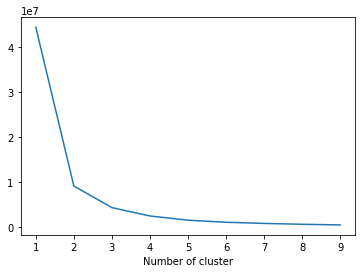

In [124]:
# creating cluster
sse={}
recency = df3[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

***in above we have inertia in y axis and no of cluster in x axis. a good model is with low inertia and low cluster.therefore 3 is obvious choice***                                     
****Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster***

In [125]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df3[['Recency']])
df3['RecencyCluster'] = kmeans.predict(df3[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df3= order_cluster('RecencyCluster', 'Recency',df3,False)
df3

,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,15100.0,329,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0
...,...,...,...
4359,13889.0,92,1
4360,15488.0,92,1
4361,18222.0,92,1
4362,13244.0,92,1


In [126]:
df3[df3['RecencyCluster']==2]

,CustomerID,Recency,RecencyCluster
634,13047.0,31,2
635,12583.0,2,2
636,15291.0,25,2
637,14688.0,7,2
638,17809.0,15,2
...,...,...,...
3544,13436.0,1,2
3545,15520.0,1,2
3546,13298.0,0,2
3547,14569.0,0,2


***2.calculating frequency and frequency cluster***

In [127]:
#get order counts for each user and create a dataframe with it
frequency = df1.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
df3 = pd.merge(df3, frequency, on='CustomerID')
df3

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,312
1,15100.0,329,0,6
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1
...,...,...,...,...
4359,13889.0,92,1,15
4360,15488.0,92,1,2
4361,18222.0,92,1,19
4362,13244.0,92,1,27


In [128]:
## predicting frequency cluster and using previsous function to order them
kmeans = KMeans(n_clusters=3)
kmeans.fit(df3[['Frequency']])
df3['FrequencyCluster'] = kmeans.predict(df3[['Frequency']])

#order the frequency cluster
df3 = order_cluster('FrequencyCluster', 'Frequency',df3,True)

In [129]:
df3

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,301,0,312,1
1,14688.0,7,2,359,1
2,15311.0,0,2,2491,1
3,14527.0,2,2,1011,1
4,17511.0,2,2,1076,1
...,...,...,...,...,...
4359,13441.0,91,1,13,0
4360,12748.0,0,2,4642,2
4361,14911.0,0,2,5903,2
4362,17841.0,1,2,7983,2


***3. calculating revenue and revenue cluster, please note i have already calculated revenue before***

In [130]:
revenue = df1.groupby('CustomerID').revenue.sum().reset_index()
df3 = pd.merge(df3, revenue, on='CustomerID')

In [131]:
df3

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,revenue
0,17850.0,301,0,312,1,5288.63
1,14688.0,7,2,359,1,5107.38
2,15311.0,0,2,2491,1,59419.34
3,14527.0,2,2,1011,1,7711.38
4,17511.0,2,2,1076,1,88125.38
...,...,...,...,...,...,...
4359,13441.0,91,1,13,0,296.64
4360,12748.0,0,2,4642,2,29072.10
4361,14911.0,0,2,5903,2,132572.62
4362,17841.0,1,2,7983,2,40340.78


In [132]:
#predicting revenue cluster and using previsous function to order them
kmeans = KMeans(n_clusters=3)
kmeans.fit(df3[['revenue']])
df3['RevenueCluster'] = kmeans.predict(df3[['revenue']])


#order the cluster numbers
df3 = order_cluster('RevenueCluster', 'revenue',df3,True)
df3

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,revenue,RevenueCluster
0,17850.0,301,0,312,1,5288.63,0
1,14688.0,7,2,359,1,5107.38,0
2,14527.0,2,2,1011,1,7711.38,0
3,13408.0,1,2,501,1,27487.41,0
4,13767.0,1,2,399,1,16945.71,0
...,...,...,...,...,...,...,...
4359,17841.0,1,2,7983,2,40340.78,1
4360,14096.0,3,2,5128,2,57120.91,1
4361,17450.0,7,2,351,1,187482.17,2
4362,18102.0,0,2,433,1,256438.49,2


*** let us understand what cluster with 0,1,2 mean***

In [133]:
#for recency
df3.groupby('RecencyCluster')['Recency'].describe()
### we can notice that for cluster 0 we have mean 294 whereas 2 has mean 24. this shows that cluster 0 has most inactive persons
### and cluster 2 has the most active people

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,634.0,294.372240,45.419375,224.0,256.0,287.0,329.0,373.0
1,815.0,151.602454,38.467083,91.0,116.0,150.0,184.0,222.0
2,2915.0,30.013036,24.796685,0.0,8.5,23.0,49.0,90.0


In [134]:
#for frequency
df3.groupby('FrequencyCluster')['Frequency'].describe()
### we can notice that for cluster 0 we have mean 60 whereas 2 has mean 5914. 
## this shows that people in cluster 0 do not buy much item, where as people in cluster 2 buys very often

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4100.0,60.586098,61.711447,1.0,16.00,37.0,86.00,287.0
1,260.0,514.784615,328.508904,289.0,336.75,414.0,547.25,2782.0
2,4.0,5914.000000,1473.845537,4642.0,5006.50,5515.5,6423.00,7983.0


In [135]:
#for frequency
df3.groupby('RevenueCluster')['revenue'].describe()
### we can notice that for cluster 0 we have mean 1431 whereas 2 has mean 241136. 
## this shows that people in cluster 0 do not bring high revenue, where as people in cluster 2 bring high revenue.

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4339.0,1438.021121,2473.840726,-4287.63,291.475,642.02,1562.170,30300.82
1,22.0,59696.842273,29287.039236,31300.08,37348.760,52287.28,61844.660,132572.62
2,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.49,267963.755,279489.02


**now its time to calculate overall score for the customers**                  
***overall score can be calculated by adding all the cluster***

In [136]:
df3['OverallScore'] = df3['RecencyCluster'] + df3['FrequencyCluster'] + df3['RevenueCluster']
df3.groupby('OverallScore')['Recency','Frequency','revenue'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,revenue
OverallScore,,,
0,294.361769,22.946288,397.188167
1,151.890394,39.498768,702.212058
2,31.924585,76.239819,1459.952569
3,13.112450,477.538153,7510.161365
4,5.750000,1360.583333,63285.764167
5,2.000000,3647.166667,158907.331667


***in above we can see that overall score with 0 has low score on all the 3 parameters. where as overallscore of 5 has best of all parameters. Here we can divide people into 3 groups.***
 1.  low level priority (0-1)
 2.  mid level priority (2-3)
 3.  high level priority.(4-5)

In [137]:
df3

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,revenue,RevenueCluster,OverallScore
0,17850.0,301,0,312,1,5288.63,0,1
1,14688.0,7,2,359,1,5107.38,0,3
2,14527.0,2,2,1011,1,7711.38,0,3
3,13408.0,1,2,501,1,27487.41,0,3
4,13767.0,1,2,399,1,16945.71,0,3
...,...,...,...,...,...,...,...,...
4359,17841.0,1,2,7983,2,40340.78,1,5
4360,14096.0,3,2,5128,2,57120.91,1,5
4361,17450.0,7,2,351,1,187482.17,2,5
4362,18102.0,0,2,433,1,256438.49,2,5


In [138]:
## segmenting users on overall score
df3['segment'] = ['low' if 0==x or x==1 else 'mid' if 2==x or x==3 else 'high' for x in df3['OverallScore']]
df3

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,revenue,RevenueCluster,OverallScore,segment
0,17850.0,301,0,312,1,5288.63,0,1,low
1,14688.0,7,2,359,1,5107.38,0,3,mid
2,14527.0,2,2,1011,1,7711.38,0,3,mid
3,13408.0,1,2,501,1,27487.41,0,3,mid
4,13767.0,1,2,399,1,16945.71,0,3,mid
...,...,...,...,...,...,...,...,...,...
4359,17841.0,1,2,7983,2,40340.78,1,5,high
4360,14096.0,3,2,5128,2,57120.91,1,5,high
4361,17450.0,7,2,351,1,187482.17,2,5,high
4362,18102.0,0,2,433,1,256438.49,2,5,high


**we have completed customer segmentation. Now its time to build ML model that will segment customers based on Recency,	Frequency,	revenue**

In [139]:
#let us create a new dataframe for model training. the dataframe will contain only recency,frequency,revenue and segemnt(label encoded to '0','1','2')
df4=df3[['Recency','Frequency','revenue','segment']]
df4

,Recency,Frequency,revenue,segment
0,301,312,5288.63,low
1,7,359,5107.38,mid
2,2,1011,7711.38,mid
3,1,501,27487.41,mid
4,1,399,16945.71,mid
...,...,...,...,...
4359,1,7983,40340.78,high
4360,3,5128,57120.91,high
4361,7,351,187482.17,high
4362,0,433,256438.49,high


In [140]:
#label encoding
label= {'low': 0,'mid': 1,'high':'2'}
df4.segment = [label[item] for item in df4.segment]
df4

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,revenue,segment
0,301,312,5288.63,0
1,7,359,5107.38,1
2,2,1011,7711.38,1
3,1,501,27487.41,1
4,1,399,16945.71,1
...,...,...,...,...
4359,1,7983,40340.78,2
4360,3,5128,57120.91,2
4361,7,351,187482.17,2
4362,0,433,256438.49,2


In [141]:
df4['segment']=df4['segment'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
# creating x and y
x = df4[['Recency','Frequency','revenue']]
y = df4['segment']

In [143]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4359    2
4360    2
4361    2
4362    2
4363    2
Name: segment, Length: 4364, dtype: int64

In [144]:
#creating train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**we will be using light GBM algorithm for multiclass classification**         
**we will chech the model for accuracy and create confusion matrix to see how many label it got correct**

In [145]:
#defining and training light gbm
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [146]:
#predicting 
y_pred=clf.predict(x_test)

In [147]:
#calculating accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9945


In [148]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [149]:
cm

array([[372,   2,   0],
       [  1, 711,   1],
       [  0,   2,   2]])

In [150]:
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

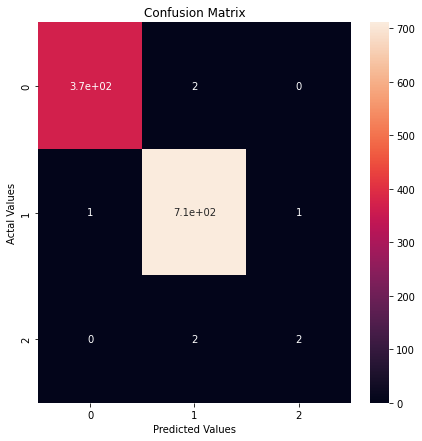

In [151]:
#Plotting the confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


**conclusion:-**

1.   **no of test :1090**
2.   **the model has achieved a accuracy of 99.82 %**
3.   **from confusion matrix we can see that model has done well in predicting correct label.**                                 
**correct label (376+709)=1085**                               
**wrong label=(6)**

